In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/porto-seguros-safe-driver-prediction-dataset/sample_submission.csv
/kaggle/input/porto-seguros-safe-driver-prediction-dataset/train.csv
/kaggle/input/porto-seguros-safe-driver-prediction-dataset/test.csv


**EDA**

In [2]:
import pandas as pd

data_path = '/kaggle/input/porto-seguros-safe-driver-prediction-dataset/'

train = pd.read_csv(data_path + 'train.csv', index_col = 'id')
test = pd.read_csv(data_path + 'test.csv', index_col = 'id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col = 'id')

In [3]:
train.shape, test.shape

((595212, 58), (892816, 57))

In [4]:
train.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [5]:
test.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
0,0,1,8,1,0,0,1,0,0,0,...,1,1,1,12,0,1,1,0,0,1
1,4,2,5,1,0,0,0,0,1,0,...,2,0,3,10,0,0,1,1,0,1
2,5,1,3,0,0,0,0,0,1,0,...,4,0,2,4,0,0,0,0,0,0
3,0,1,6,0,0,1,0,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,5,1,7,0,0,0,0,0,1,0,...,4,0,0,4,0,1,1,0,0,1


In [6]:
submission.head()

,target
id,
0,0.0364
1,0.0364
2,0.0364
3,0.0364
4,0.0364


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17

<AxesSubplot:>

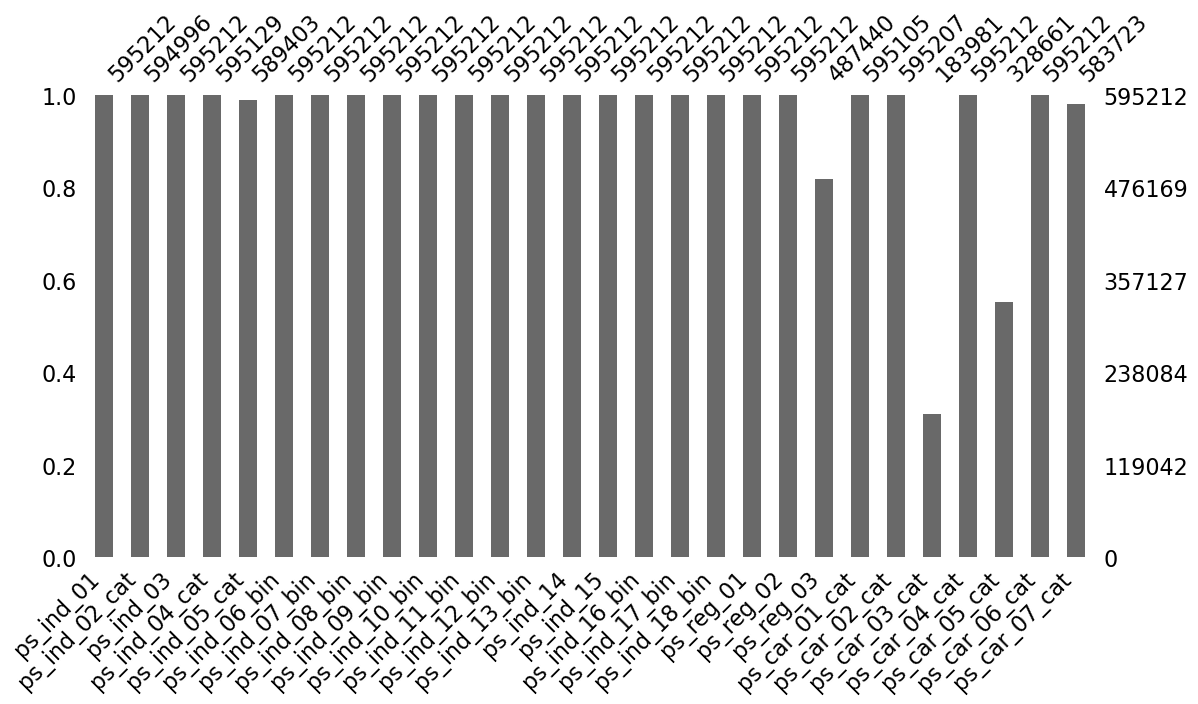

In [8]:
import numpy as np
import missingno as msno

train_copy = train.copy().replace(-1, np.NaN)

msno.bar(df = train_copy.iloc[:, 1:29], figsize = (13, 6))

<AxesSubplot:>

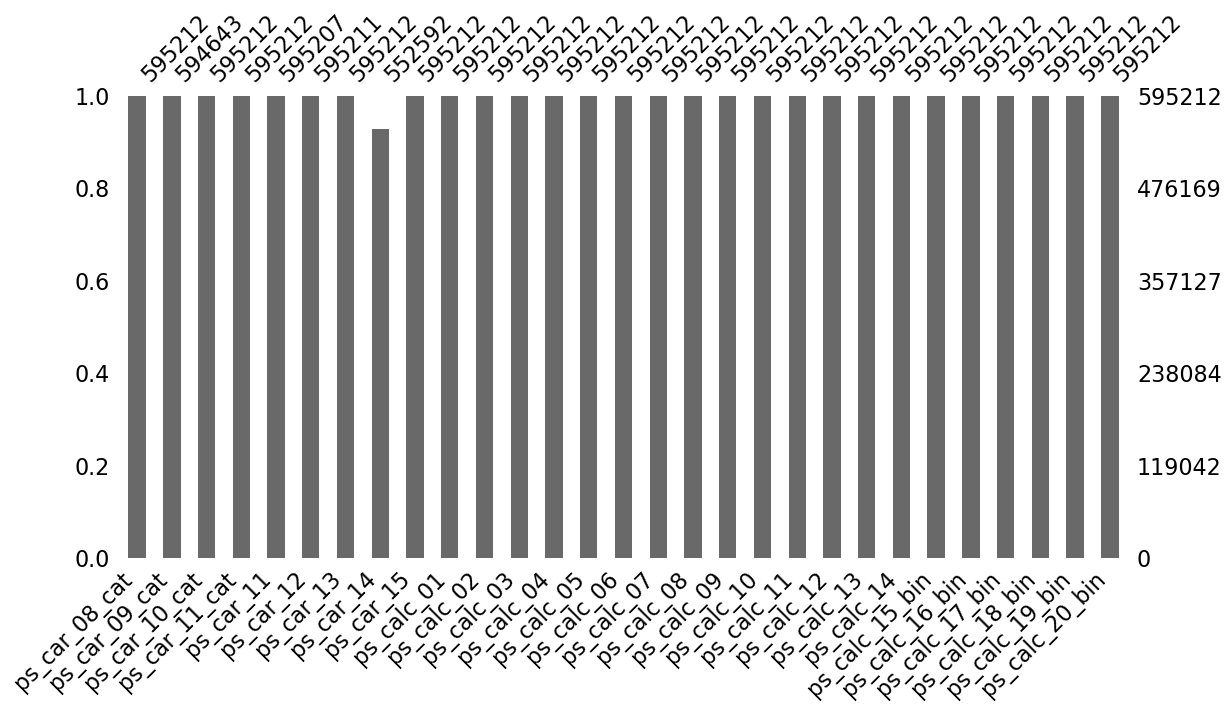

In [9]:
msno.bar(df = train_copy.iloc[:, 29:], figsize = (13, 6))

<AxesSubplot:>

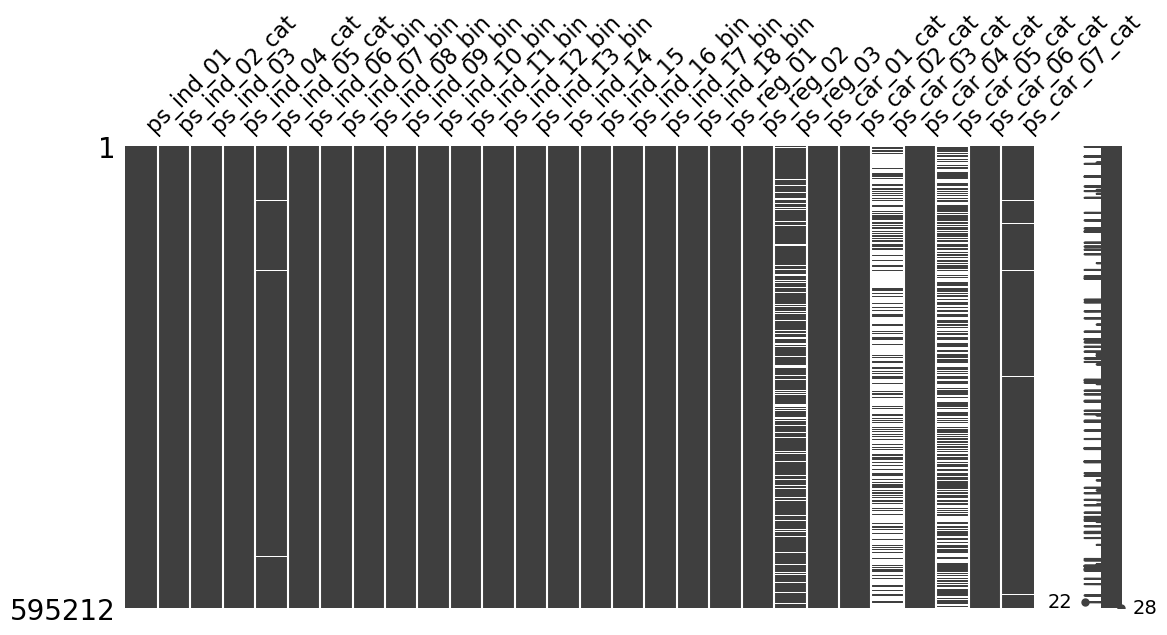

In [10]:
msno.matrix(df = train_copy.iloc[:, 1:29], figsize = (13, 6))

<AxesSubplot:>

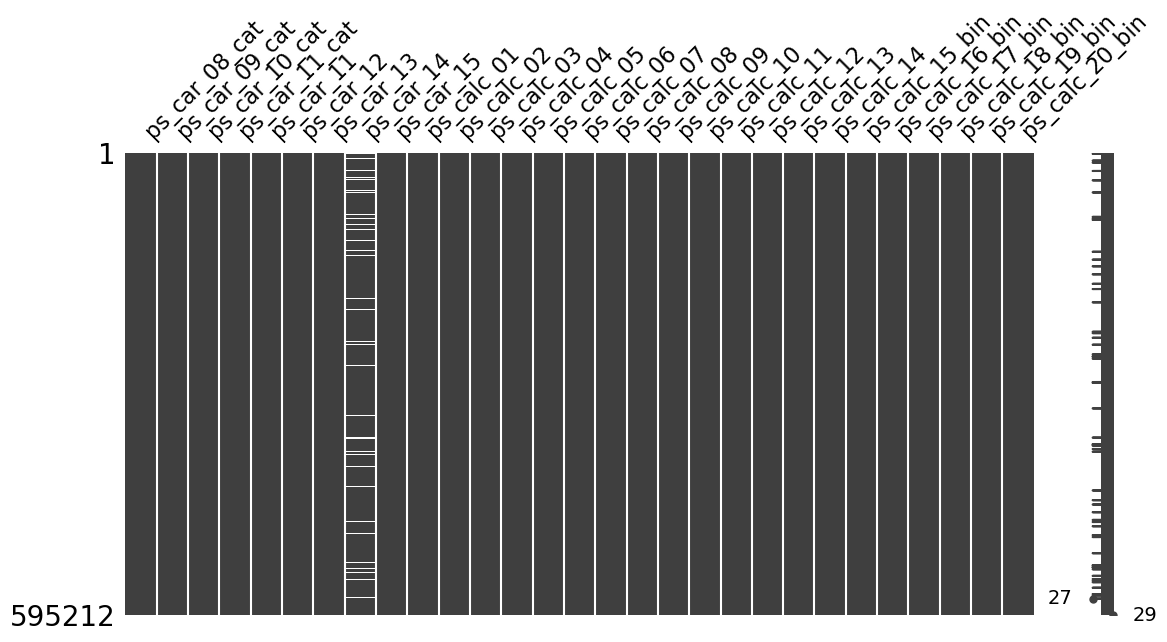

In [11]:
msno.matrix(df = train_copy.iloc[:, 29:], figsize = (13, 6))

In [12]:
def resumetable(df):
    print(f'dataset shape: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns = ['data type'])
    summary['null count'] = (df == -1).sum().values
    summary['unique count'] = df.nunique().values
    summary['data kind'] = None
    
    for col in df.columns:
        if 'bin' in col or col == 'target':
            summary.loc[col, 'data kind'] = '이진형'
        elif 'cat' in col:
            summary.loc[col, 'data kind'] = '명목형'
        elif df[col].dtype == float:
            summary.loc[col, 'data kind'] = '연속형'
        elif df[col].dtype == int:
            summary.loc[col, 'data kind'] = '순서형'
            
    return summary


In [13]:
summary = resumetable(train)
summary

dataset shape: (595212, 58)


,data type,null count,unique count,data kind
target,int64,0,2,이진형
ps_ind_01,int64,0,8,순서형
ps_ind_02_cat,int64,216,5,명목형
ps_ind_03,int64,0,12,순서형
ps_ind_04_cat,int64,83,3,명목형
ps_ind_05_cat,int64,5809,8,명목형
ps_ind_06_bin,int64,0,2,이진형
ps_ind_07_bin,int64,0,2,이진형
ps_ind_08_bin,int64,0,2,이진형
ps_ind_09_bin,int64,0,2,이진형


In [14]:
summary[summary['data kind'] == '명목형'].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object')

In [15]:
summary[summary['data type'] == 'float64'].index

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'],
      dtype='object')

In [16]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Target Distribution')

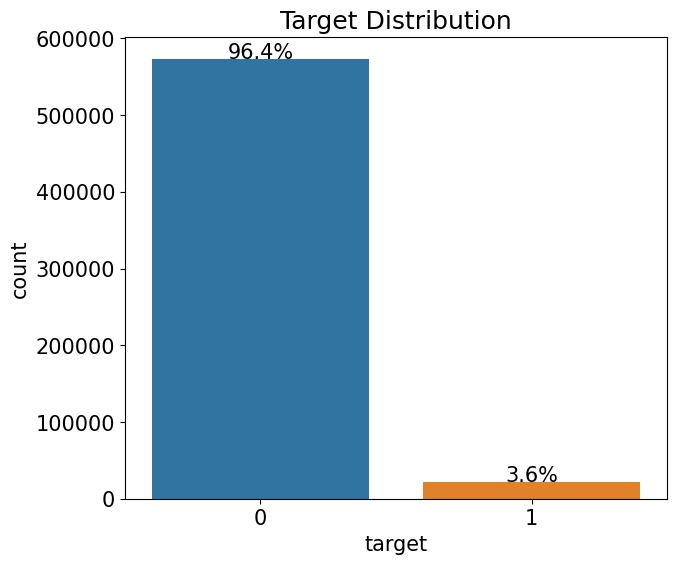

In [17]:
def write_percent(ax, total_size):
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height / total_size * 100
        
        ax.text(left_coord + width / 2.0,
               height + total_size * 0.001,
               '{:1.1f}%'.format(percent),
               ha = 'center')
        
mpl.rc('font', size = 15)
plt.figure(figsize = (7, 6))

ax = sns.countplot(x = 'target', data = train)
write_percent(ax, len(train))
ax.set_title('Target Distribution')

In [18]:
import matplotlib.gridspec as gridspec

def plot_target_ratio_by_features(df, features, num_rows, num_cols, size = (12, 18)):
    mpl.rc('font', size = 9)
    plt.figure(figsize = size)
    grid = gridspec.GridSpec(num_rows, num_cols)
    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
    
    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        sns.barplot(x = feature, y = 'target', data = df, palette = 'Set2', ax = ax)

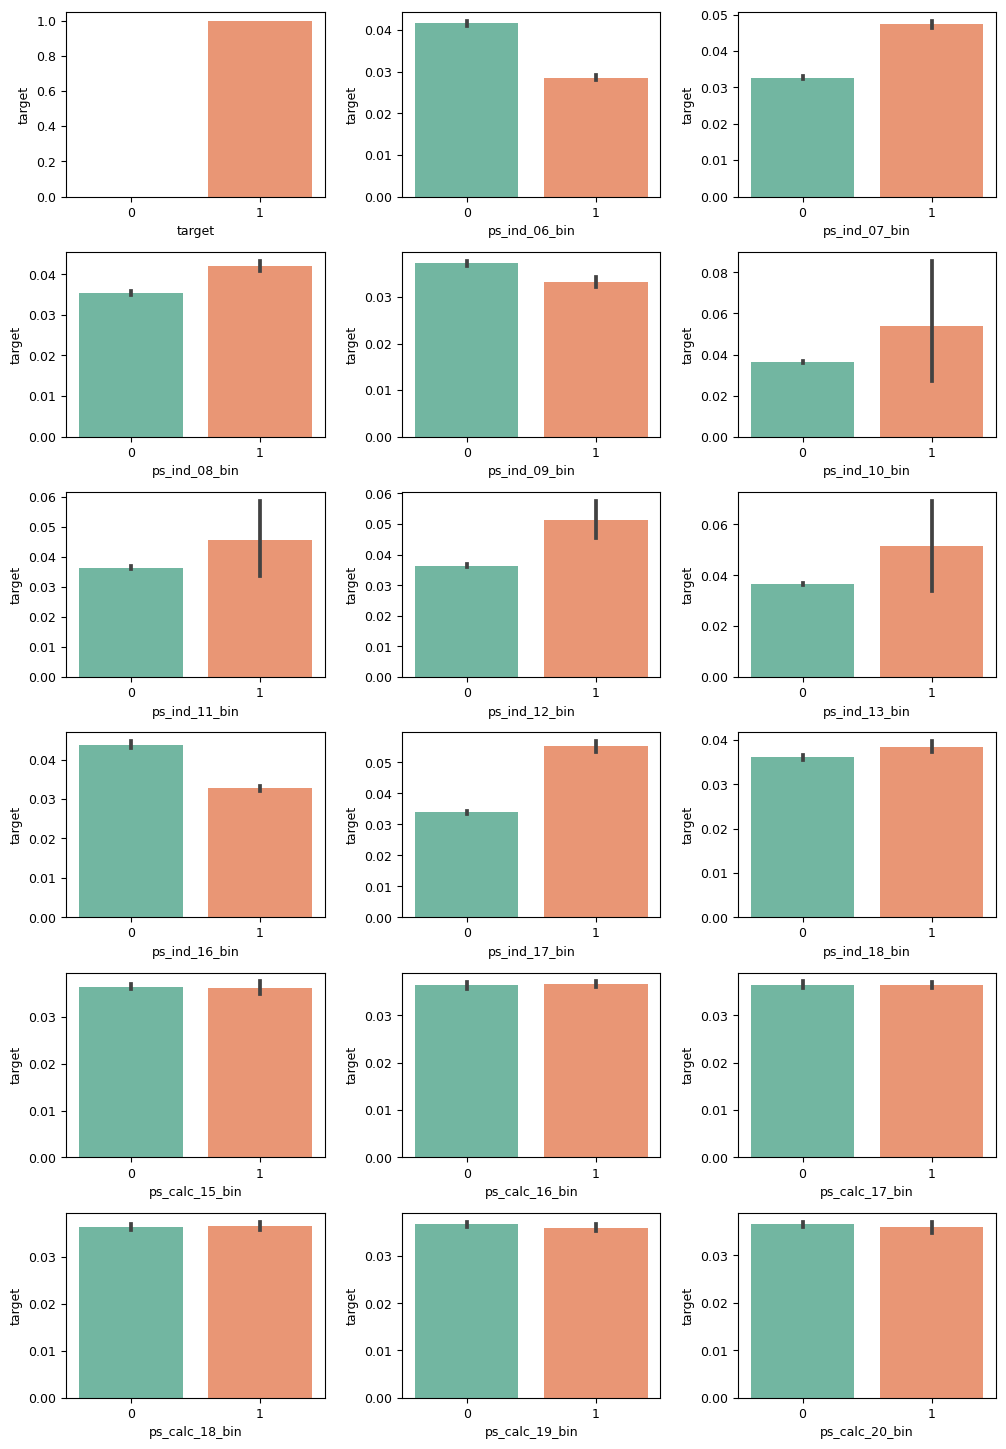

In [19]:
bin_features = summary[summary['data kind'] == '이진형'].index
plot_target_ratio_by_features(train, bin_features, 6, 3)

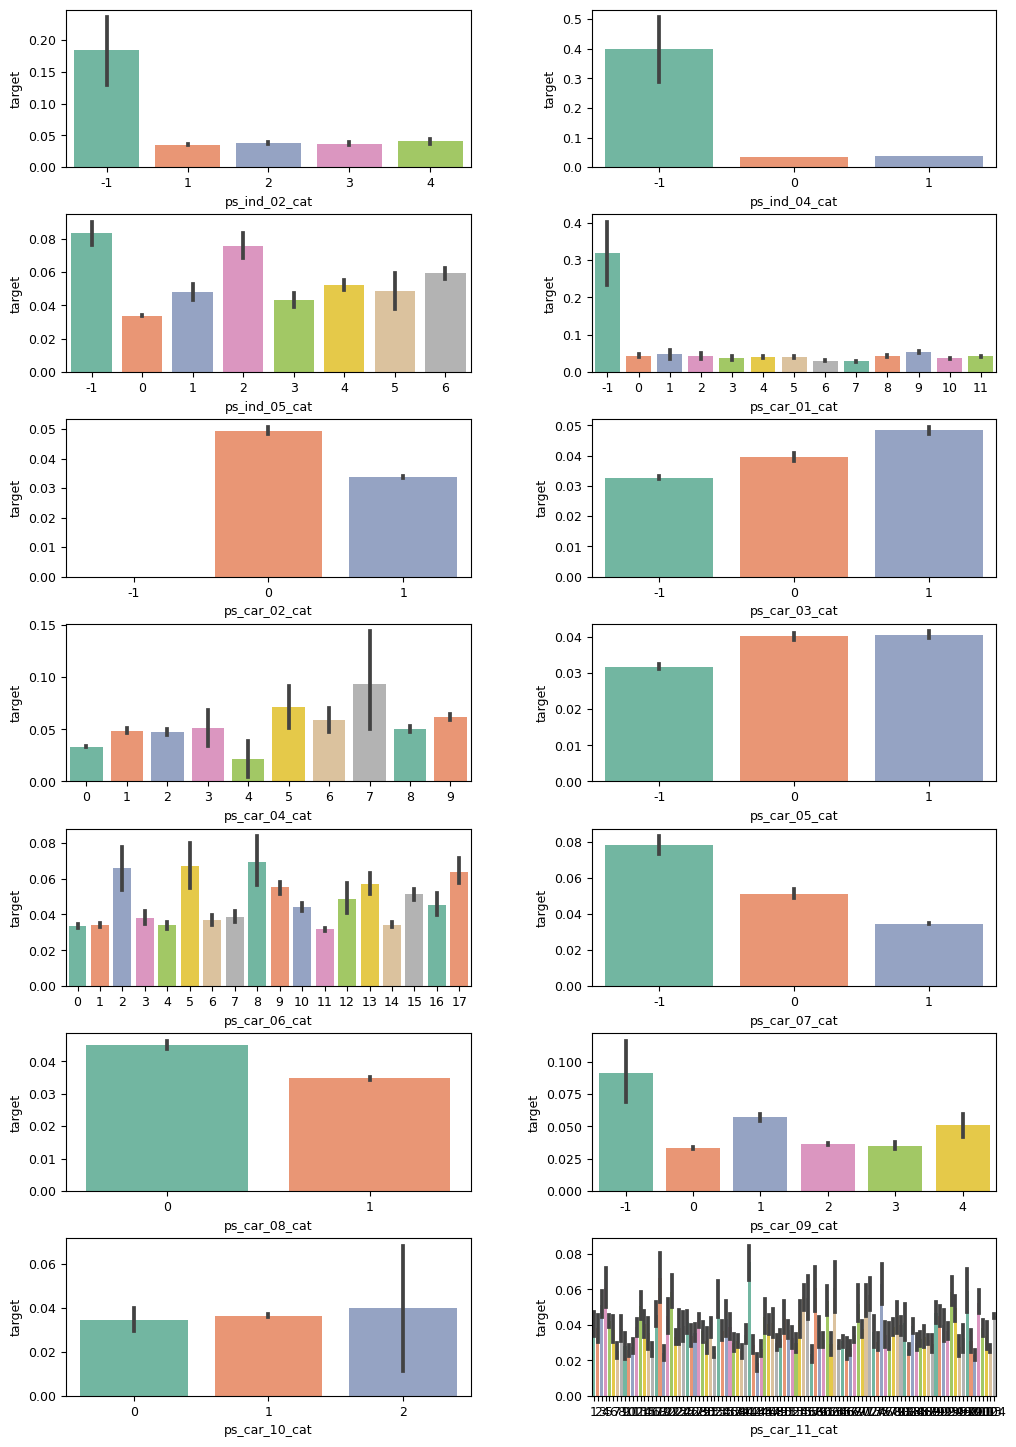

In [20]:
nom_features = summary[summary['data kind'] == '명목형'].index
plot_target_ratio_by_features(train, nom_features, 7, 2)

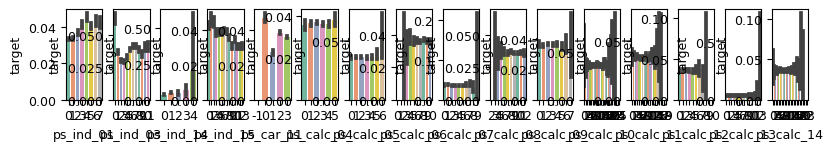

In [21]:
ord_features = summary[summary['data kind'] == '순서형'].index
plot_target_ratio_by_features(train, ord_features, 12, 20)

In [22]:
pd.cut([1.0, 1.5, 2.1, 2.7, 3.5, 4.0], 3)

[(0.997, 2.0], (0.997, 2.0], (2.0, 3.0], (2.0, 3.0], (3.0, 4.0], (3.0, 4.0]]
Categories (3, interval[float64, right]): [(0.997, 2.0] < (2.0, 3.0] < (3.0, 4.0]]

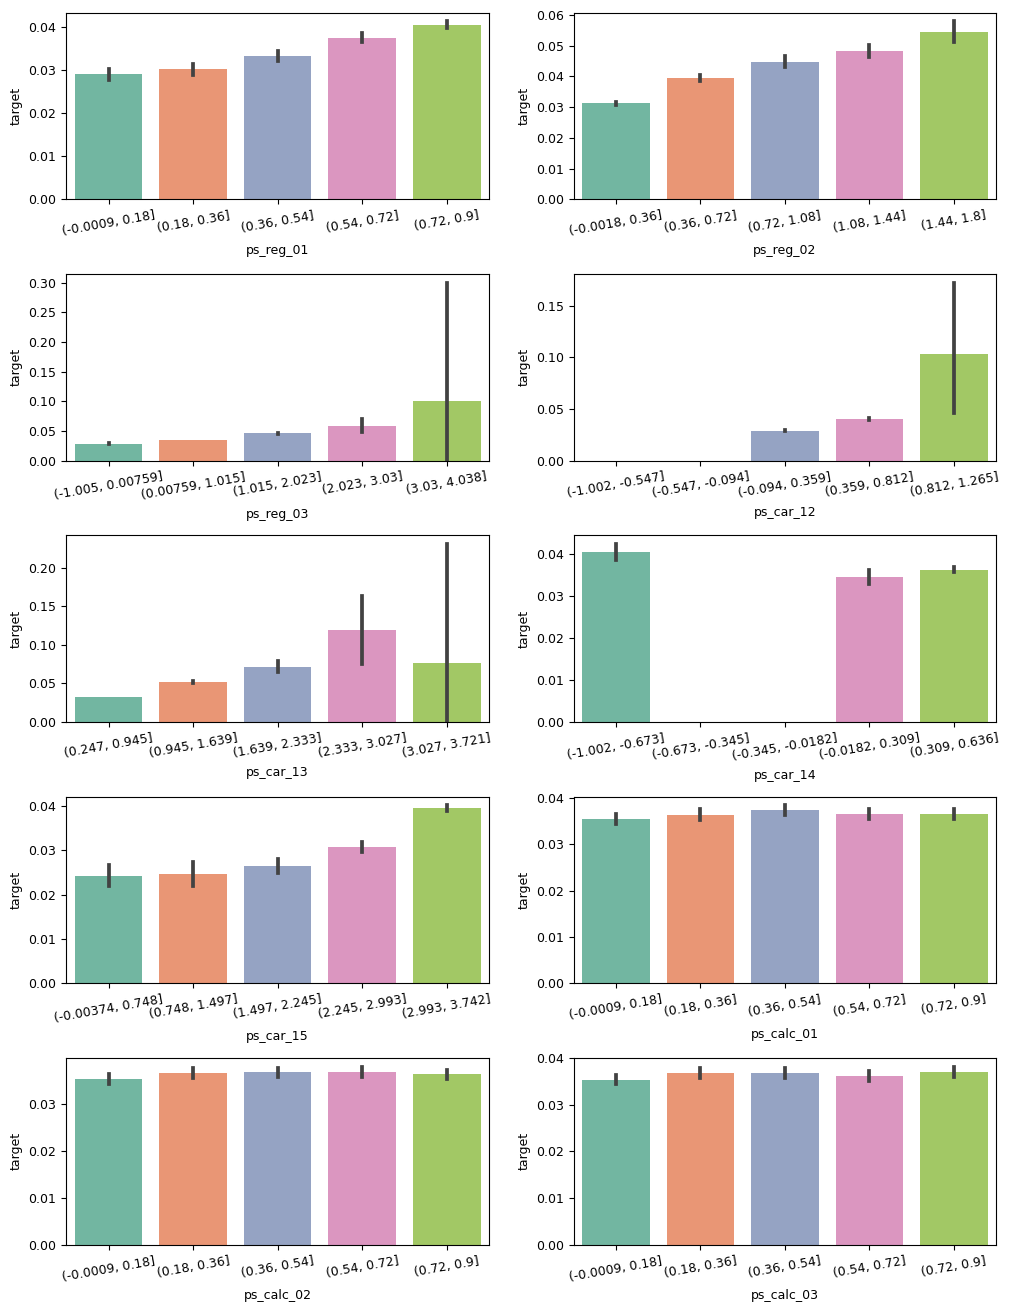

In [23]:
cont_features = summary[summary['data kind'] == '연속형'].index

plt.figure(figsize = (12, 16))
grid = gridspec.GridSpec(5, 2)
plt.subplots_adjust(wspace = 0.2, hspace = 0.4)

for idx, cont_feature in enumerate(cont_features):
    train[cont_feature] = pd.cut(train[cont_feature], 5)
    
    ax = plt.subplot(grid[idx])
    sns.barplot(x = cont_feature, y = 'target', data = train, palette = 'Set2', ax = ax)
    ax.tick_params(axis = 'x', labelrotation = 10)

In [24]:
train_copy = train_copy.dropna()

<AxesSubplot:>

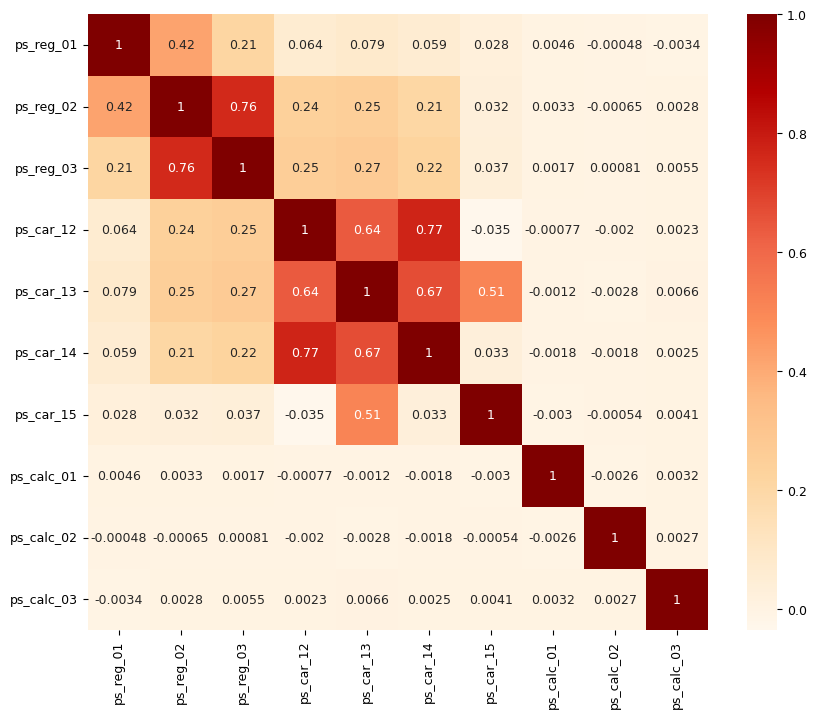

In [25]:
plt.figure(figsize = (10, 8))
cont_corr = train_copy[cont_features].corr()
sns.heatmap(cont_corr, annot = True, cmap = 'OrRd')

**Model**

In [26]:
import pandas as pd

data_path = '/kaggle/input/porto-seguros-safe-driver-prediction-dataset/'

train = pd.read_csv(data_path + 'train.csv', index_col = 'id')
test = pd.read_csv(data_path + 'test.csv', index_col = 'id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col = 'id')

In [27]:
all_data = pd.concat([train, test], ignore_index = True)
all_data = all_data.drop('target', axis = 1)

In [28]:
all_features = all_data.columns
all_features

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='obj

In [29]:
from sklearn.preprocessing import OneHotEncoder

cat_features = [feature for feature in all_features if 'cat' in feature]
onehot_encoder = OneHotEncoder()

encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features])
encoded_cat_matrix

<1488028x184 sparse matrix of type '<class 'numpy.float64'>'
	with 20832392 stored elements in Compressed Sparse Row format>

In [30]:
drop_features = ['ps_ind_14', 'ps_ind_10_bin', 'ps_ind_11_bin',
                'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_14']

remaining_features = [feature for feature in all_features
                     if ('cat' not in feature and
                        'calc' not in feature and
                        feature not in drop_features)]

In [31]:
from scipy import sparse

all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data[remaining_features]),
                              encoded_cat_matrix], format = 'csr')

In [32]:
num_train = len(train)

X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train['target'].values

지니계수

In [33]:
import numpy as np

def eval_gini(y_true, y_pred):
    assert y_true.shape == y_pred.shape
    
    n_samples = y_true.shape[0]
    L_mid = np.linspace(1 / n_samples, 1, n_samples)
    
    pred_order = y_true[y_pred.argsort()]
    L_pred = np.cumsum(pred_order) / np.sum(pred_order)
    G_pred = np.sum(L_mid - L_pred)
    
    true_order = y_true[y_true.argsort()]
    L_true = np.cumsum(true_order) / np.sum(true_order)
    G_true = np.sum(L_mid - L_true)
    
    return G_pred / G_true

In [34]:
def gini(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', eval_gini(labels, preds), True

훈련/검증

In [35]:
from sklearn.model_selection import StratifiedKFold

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1991)

In [36]:
params = {'objective':'binary',
         'learning_rate':0.01,
         'force_row_wise':True,
         'random_state':0}

In [37]:
oof_val_preds = np.zeros(X.shape[0])
oof_test_preds = np.zeros(X_test.shape[0])

In [38]:
import lightgbm as lgb

for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    print('#' * 40, f'fold {idx + 1} / fold {folds.n_splits}', '#' * 40)
    
    X_train, y_train = X[train_idx], y[train_idx]
    X_valid, y_valid = X[valid_idx], y[valid_idx]
    
    dtrain = lgb.Dataset(X_train, y_train)
    dvalid = lgb.Dataset(X_valid, y_valid)
    
    lgb_model = lgb.train(params = params, 
                         train_set = dtrain,
                         num_boost_round = 1000,
                         valid_sets = dvalid,
                         feval = gini,
                         early_stopping_rounds = 100,
                         verbose_eval = 100)
    
    oof_test_preds += lgb_model.predict(X_test) / folds.n_splits
    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)
    
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'fold {idx + 1} gini : {gini_score}\n')

######################################## fold 1 / fold 5 ########################################


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1095
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.153354	valid_0's gini: 0.261651
[200]	valid_0's binary_logloss: 0.152426	valid_0's gini: 0.275704
[300]	valid_0's binary_logloss: 0.152023	valid_0's gini: 0.282277
[400]	valid_0's binary_logloss: 0.1518	valid_0's gini: 0.286648
[500]	valid_0's binary_logloss: 0.151713	valid_0's gini: 0.287944
[600]	valid_0's binary_logloss: 0.151672	valid_0's gini: 0.288637
[700]	valid_0's binary_logloss: 0.151659	valid_0's gini: 0.288939
Early stopping, best iteration is:
[681]	valid_0's binary_logloss: 0.151659	valid_0's gini: 0.289034
fold 1 gini : 0.2890336154188232

########

In [39]:
print('oof eval gini:', eval_gini(y, oof_val_preds))

oof eval gini: 0.2804995714877777


예측

In [40]:
submission['target'] = oof_test_preds
submission.to_csv('submission.csv')

**성능개선**

In [41]:
import pandas as pd

data_path = '/kaggle/input/porto-seguros-safe-driver-prediction-dataset/'

train = pd.read_csv(data_path + 'train.csv', index_col = 'id')
test = pd.read_csv(data_path + 'test.csv', index_col = 'id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col = 'id')

In [42]:
all_data = pd.concat([train, test], ignore_index = True)
all_data = all_data.drop('target', axis = 1)

all_features = all_data.columns

In [43]:
from sklearn.preprocessing import OneHotEncoder

cat_features = [feature for feature in all_features if 'cat' in feature]

onehot_encoder = OneHotEncoder()
encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features])

In [44]:
all_data['num_missing'] = (all_data == -1).sum(axis = 1)

In [45]:
remaining_features = [feature for feature in all_features
                     if ('cat' not in feature and 'calc' not in feature)]

remaining_features.append('num_missing')

In [46]:
ind_features = [feature for feature in all_features if 'ind' in feature]

is_first_feature = True

for ind_feature in ind_features:
    if is_first_feature:
        all_data['mix_ind'] = all_data[ind_feature].astype(str) + '_'
        is_first_feature = False
    else:
        all_data['mix_ind'] += all_data[ind_feature].astype(str) + '_'

In [47]:
all_data['mix_ind']

0          2_2_5_1_0_0_1_0_0_0_0_0_0_0_11_0_1_0_
1           1_1_7_0_0_0_0_1_0_0_0_0_0_0_3_0_0_1_
2          5_4_9_1_0_0_0_1_0_0_0_0_0_0_12_1_0_0_
3           0_1_2_0_0_1_0_0_0_0_0_0_0_0_8_1_0_0_
4           0_2_0_1_0_1_0_0_0_0_0_0_0_0_9_1_0_0_
                           ...                  
1488023     0_1_6_0_0_0_1_0_0_0_0_0_0_0_2_0_0_1_
1488024    5_3_5_1_0_0_0_1_0_0_0_0_0_0_11_1_0_0_
1488025     0_1_5_0_0_1_0_0_0_0_0_0_0_0_5_0_0_1_
1488026    6_1_5_1_0_0_0_0_1_0_0_0_0_0_13_1_0_0_
1488027    7_1_4_1_0_0_0_0_1_0_0_0_0_0_12_1_0_0_
Name: mix_ind, Length: 1488028, dtype: object

In [48]:
all_data['ps_ind_02_cat'].value_counts()

 1    1079327
 2     309747
 3      70172
 4      28259
-1        523
Name: ps_ind_02_cat, dtype: int64

In [49]:
all_data['ps_ind_02_cat'].value_counts().to_dict()

{1: 1079327, 2: 309747, 3: 70172, 4: 28259, -1: 523}

In [51]:
cat_count_features = []
for feature in cat_features+['mix_ind']:
    val_counts_dict = all_data[feature].value_counts().to_dict()
    all_data[f'{feature}_count'] = all_data[feature].apply(lambda x: val_counts_dict[x])
    
    cat_count_features.append(f'{feature}_count')

In [52]:
cat_count_features

['ps_ind_02_cat_count',
 'ps_ind_04_cat_count',
 'ps_ind_05_cat_count',
 'ps_car_01_cat_count',
 'ps_car_02_cat_count',
 'ps_car_03_cat_count',
 'ps_car_04_cat_count',
 'ps_car_05_cat_count',
 'ps_car_06_cat_count',
 'ps_car_07_cat_count',
 'ps_car_08_cat_count',
 'ps_car_09_cat_count',
 'ps_car_10_cat_count',
 'ps_car_11_cat_count',
 'mix_ind_count']

In [54]:
from scipy import sparse

drop_features = ['ps_ind_14', 'ps_ind_10_bin', 'ps_ind_11_bin', 
                'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_14']

all_data_remaining = all_data[remaining_features + cat_count_features].drop(drop_features, axis = 1)

all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data_remaining),
                              encoded_cat_matrix],
                             format = 'csr')

In [55]:
num_train = len(train)

X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train['target'].values

In [56]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 0)

bayes_dtrain = lgb.Dataset(X_train, y_train)
bayes_dvalid = lgb.Dataset(X_valid, y_valid)

In [57]:
params_bounds = {'num_leaves':(30, 40),
                 'lambda_l1': (0.7, 0.9),
                 'lambda_l2': (0.9, 1),
                 'feature_fraction':(0.6, 0.7),
                 'bagging_fraction':(0.6, 0.9),
                 'min_child_samples':(6, 10),
                 'min_child_weight':(10, 40)}

fixed_params = {'objective':'binary',
               'learning_rate':0.005,
               'bagging_freq':1,
               'force_row_wise':True,
               'random_state':1991}

In [58]:
def eval_function(num_leaves, lambda_l1, lambda_l2, feature_fraction,
                 bagging_fraction, min_child_samples, min_child_weight):
    params = {'num_leaves':int(round(num_leaves)),
             'lambda_l1':lambda_l1,
             'lambda_l2':lambda_l2,
             'feature_fraction':feature_fraction,
             'bagging_fraction':bagging_fraction,
             'min_child_samples':int(round(min_child_samples)),
             'min_child_weight':min_child_weight,
             'feature_pre_filter':False}
    
    params.update(fixed_params)
    print('hyperparameter:',params)
    
    lgb_model = lgb.train(params = params,
                         train_set = bayes_dtrain,
                         num_boost_round = 2500,
                         valid_sets = bayes_dvalid,
                         feval = gini,
                         early_stopping_rounds = 300,
                         verbose_eval = False)
    
    preds = lgb_model.predict(X_valid)
    gini_score = eval_gini(y_valid, preds)
    print(f'gini : {gini_score}\n')
    
    return gini_score

In [60]:
from bayes_opt import BayesianOptimization

optimizer = BayesianOptimization(f = eval_function,
                                pbounds = params_bounds,
                                random_state = 0)

In [61]:
optimizer.maximize(init_points = 3, n_iter = 6)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | min_ch... | min_ch... | num_le... |
-------------------------------------------------------------------------------------------------------------
hyperparameter: {'num_leaves': 34, 'lambda_l1': 0.8205526752143287, 'lambda_l2': 0.9544883182996897, 'feature_fraction': 0.6715189366372419, 'bagging_fraction': 0.7646440511781974, 'min_child_samples': 8, 'min_child_weight': 29.376823391999682, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 17383, number of negative: 458786
[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091
gini : 0.2855811556220905

| 1         | 0.2856    | 0.7646    | 0.6715    | 0.8206    | 0.9545    | 7.695     | 29.38     | 34.38     |
hyperparameter: {'num_leaves': 39, 'lambda_l1': 0.7766883037651555, 'lambda_l2': 0.9791725038082665, 'feature_fraction': 0.6963662760501029, 'bagging_fraction': 0.867531900234624, 'min_child_samples': 8, 'min_child_weight': 27.04133683281797, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17383, number of negative: 458786
[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data point

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091
gini : 0.2828993761731121

| 4         | 0.2829    | 0.8978    | 0.6594    | 0.8445    | 0.9234    | 8.619     | 10.55     | 30.09     |
hyperparameter: {'num_leaves': 37, 'lambda_l1': 0.7738449330497988, 'lambda_l2': 0.9032695189818599, 'feature_fraction': 0.6606341064409726, 'bagging_fraction': 0.7666713964943057, 'min_child_samples': 9, 'min_child_weight': 29.306172421380474, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17383, number of negative: 458786


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091
gini : 0.28513273331754563

| 5         | 0.2851    | 0.7667    | 0.6606    | 0.7738    | 0.9033    | 8.769     | 29.31     | 36.6      |
hyperparameter: {'num_leaves': 33, 'lambda_l1': 0.878140825240546, 'lambda_l2': 0.9, 'feature_fraction': 0.6949207801131031, 'bagging_fraction': 0.6580631827594777, 'min_child_samples': 10, 'min_child_weight': 35.85667779964393, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17383, number of negative: 458786


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091
gini : 0.28531708475434286

| 6         | 0.2853    | 0.6581    | 0.6949    | 0.8781    | 0.9       | 9.826     | 35.86     | 32.8      |
hyperparameter: {'num_leaves': 37, 'lambda_l1': 0.8433793375135147, 'lambda_l2': 0.9479651949974717, 'feature_fraction': 0.6859622896374784, 'bagging_fraction': 0.8362539818721497, 'min_child_samples': 6, 'min_child_weight': 39.77484183530247, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17383, number of negative: 458786


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091
gini : 0.2854766974907317

| 7         | 0.2855    | 0.8363    | 0.686     | 0.8434    | 0.948     | 6.002     | 39.77     | 36.8      |
hyperparameter: {'num_leaves': 30, 'lambda_l1': 0.7243619242443197, 'lambda_l2': 0.9, 'feature_fraction': 0.6, 'bagging_fraction': 0.6, 'min_child_samples': 10, 'min_child_weight': 27.951241679061347, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17383, number of negative: 458786


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091
gini : 0.28455469364758784

| 8         | 0.2846    | 0.6       | 0.6       | 0.7244    | 0.9       | 10.0      | 27.95     | 30.0      |
hyperparameter: {'num_leaves': 36, 'lambda_l1': 0.7, 'lambda_l2': 1.0, 'feature_fraction': 0.7, 'bagging_fraction': 0.9, 'min_child_samples': 6, 'min_child_weight': 33.90131741687068, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17383, number of negative: 458786


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091
gini : 0.2840251406982248

| 9         | 0.284     | 0.9       | 0.7       | 0.7       | 1.0       | 6.0       | 33.9      | 36.05     |


In [62]:
max_parms = optimizer.max['params']
max_params

NameError: name 'max_params' is not defined

In [ ]:
max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['min_child_samples'] = int(round(max_params['min_child_samples']))

In [ ]:
max_params.update(fixed_params)

In [ ]:
max_params

In [ ]:
from sklearn.model_selection import StratifiedKFold

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1991)

oof_val_preds = np.zeros(X.shape[0])

oof_test_preds = np.zeros(X_test.argmaxshape[0])

for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    print('#' * 40, f'fold {idx+1} / fold {folds.n_splits}', '#' * 40)
    
    X_train, y_train = X[train_idx], y[train_idx]
    X_valid, y_valid = X[valid_idx], y[valid_idx]
    
    dtrain = lgb.Dataset(X_train, y_train)
    dvalid = lgb.Dataset(X_valid, y_valid)
    
    lgb_model = lgb.train(params = max_params,
                         train_set = dtrain,
                         num_boost_round = 2500,
                         valid_sets = dvalid,
                         feval = gini,
                         early_stopping_rounds = 300,
                         verbose_eval = 100)
    
    oof_test_preds += lgb_model.predict(X_test) / folds.n_splits
    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)
    
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'fold {idx + 1} gini : {gini_score}\n')

In [ ]:
print('OOF val gini:', eval_gini(y, oof_val_preds))

In [ ]:
submission['target'] = oof_test_preds
submissions.to_csv('submission.csv')

XGBoost

In [ ]:
def gini(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', eval_gini(labels, preds)

In [ ]:
import xgboost as xgb

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 0)

bayes_dtrain = xgb.DMatrix(X_train, y_train)
bayes_dvalid = xgb.DMatrix(X_valid, y_valid)

In [ ]:
param_bounds = {'max_depth':(4, 8),
               'subsample':(0.6, 0.9),
               'colsample_bytree':(0.7, 1.0),
               'min_child_weight':(5,7),
               'gamma':(8,11),
               'reg_alpha':(7,9),
               'reg_lambda':(1.1, 1.5),
               'scale_pos_weight':(1.4, 1.6)}

fixed_params = {'objective':'binary:logistic',
               'learning_rate':0.02,
               'random_state':1991}

In [ ]:
def eval_function(max_depth, subsample, colsample_bytree, min_child_weight,
                 reg_alpha, gamma, reg_lambda, scale_pos_weight):
    params = {'max_depth':int(round(max_depth)),
             'subsample':subsample,
             'colsample_bytree':colsample_bytree,
             'min_child_weight':min_child_weight,
             'gamma':gamma,
             'reg_alpha':reg_alpha,
             'reg_lambda':reg_lambda,
             'scale_pos_weight':scale_pos_weight}
    
    params.update(fixed_params)
    print('hyperparam:', params)
    
    xgb_model = xgb.train(params = params,dtrain = bayes_dtrain,
                         num_boost_round = 2000,
                         evals = [(bayes_dvalid, 'bayes_dvalid')],
                         maximizse = True,
                         feval = gini,
                         early_stopping_rounds = 200,
                         verbose_eval = False)
    
    best_iter = xgb_model.best_iteration
    preds = xgb_model.predict(bayes_dvalid, iteration_range = (0, best_iter))
    
    gini_score = eval_gini(y_valid, preds)
    print(f'gini : {gini_score}\n')
    
    return gini_score

In [ ]:
from bayes_opt import BayesianOptimization

optimizer = BayesianOptimization(f = eval_function,
                                pbounds = param_bounds,
                                random_state = 0)

optimizer.maximize(init_points = 3, n_iter = 6)

In [ ]:
max_parms['max_depth'] = int(round(max_parmas['max_depth']))

max_params.update(fixed_params)
max_params

In [ ]:
from sklearn.model_selection import StratifiedKFold

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1991)
oof_val_preds = np.zeros(X.shape[0])

oof_test_preds = np.zeros(X_test.argmaxshape[0])

for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    print('#' * 40, f'fold {idx + 1} / fold {folds.n_splits}', '#' * 40)
    
    X_train, y_train = X[train_idx], y[train_idx]
    X_valid, y_valid = X[valid_idx], y[valid_idx]
    
    dtrain = xgb.DMatrix(X_train, y_train)
    dvalid = xgb.DMatrix(X_valid, y_valid)
    dtest = xgb.DMatrix(X_test)
    
    xgb_model = xgb.train(params = max_params,
                         dtrain = dtrain,
                         num_boost_round = 2000,
                         evals = [(dvalid, 'valid')],
                         maximize = True,
                         feval = gini,
                         early_stopping_rounds = 200,
                         verbose_eval = 100)
    
    best_iter = xgb_model.best_iteration
    oof_tet_preds += xgb_model.predict(dtest,
                                      iteration_range=(0, best_iter)) / folds.n_splits
    
    oof_val_preds[valid_idx] += xgb_model.predict(dvalid, iteration_range=(0, best_iter))
    
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'fold : {idx + 1} gini : {gini_score}\n')

In [ ]:
print('OOF val gini:', eval_gini(y, oof_val_preds))

In [ ]:
submission['target'] = oof_test_preds
submission.to_csv('submission.csv')

In [ ]:
oof_test_preds = oof_test_preds_lgb * 0.5 + oof_test_preds_xgb * 0.5

In [ ]:
submission['target'] = oof_test_preds
submission.to_csv('submission.csv')